<a href="https://colab.research.google.com/github/atharv-sh/bank_dataset/blob/main/bank_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank.csv');df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [3]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
# Set the style for the plots
sns.set_style("whitegrid")

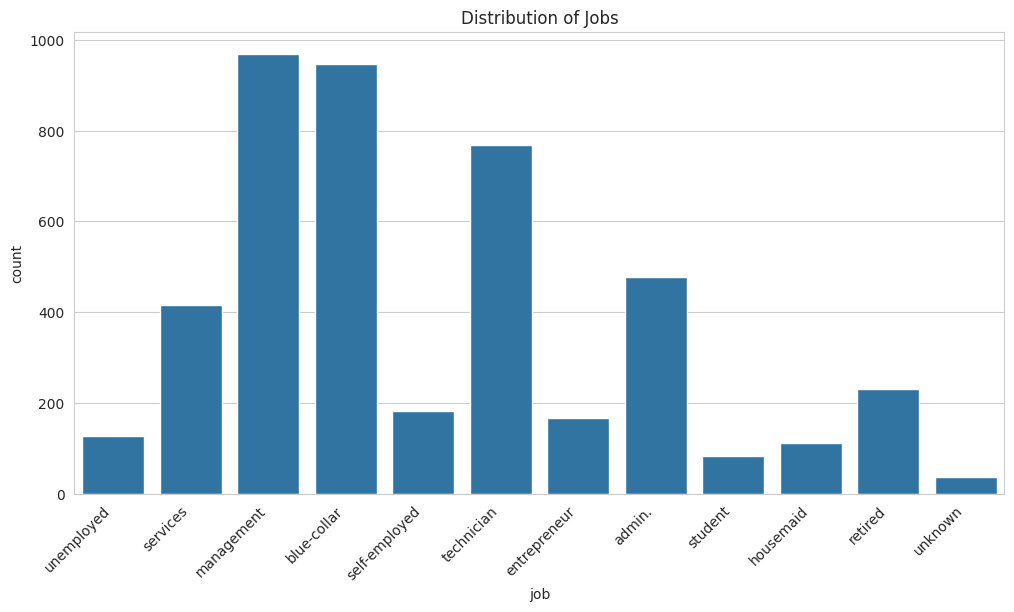

In [8]:
# Create a countplot of the 'job' column
plt.figure(figsize=(12, 6))
sns.countplot(x='job', data=df)
plt.title('Distribution of Jobs')
plt.xticks(rotation=45, ha='right')
plt.show()

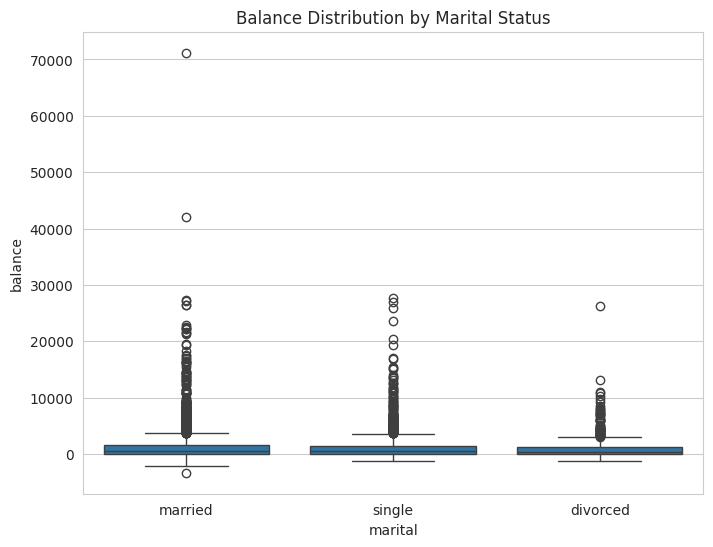

In [9]:
# Create a boxplot of 'balance' by 'marital' status
plt.figure(figsize=(8, 6))
sns.boxplot(x='marital', y='balance', data=df)
plt.title('Balance Distribution by Marital Status')
plt.show()

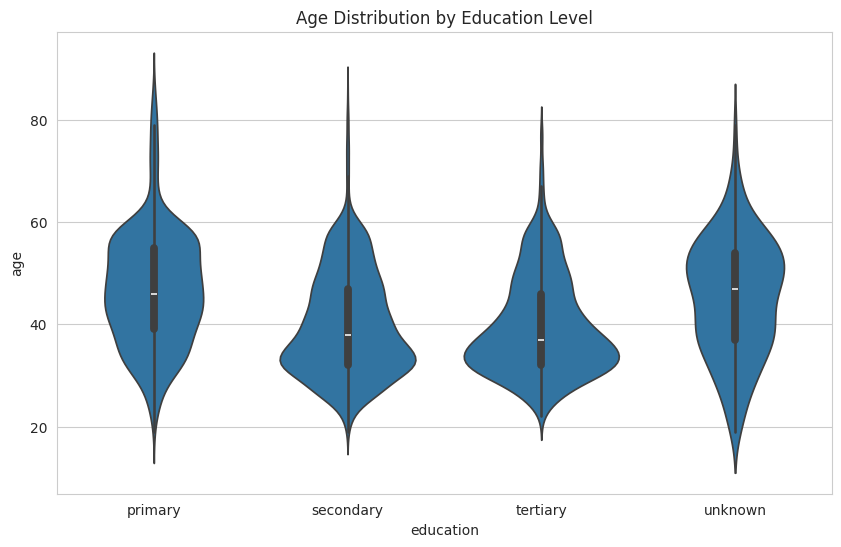

In [10]:
# Create a violinplot of 'age' by 'education'
plt.figure(figsize=(10, 6))
sns.violinplot(x='education', y='age', data=df)
plt.title('Age Distribution by Education Level')
plt.show()

In [11]:
# Create a heatmap of correlations between numeric features
numeric_cols = df.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr()

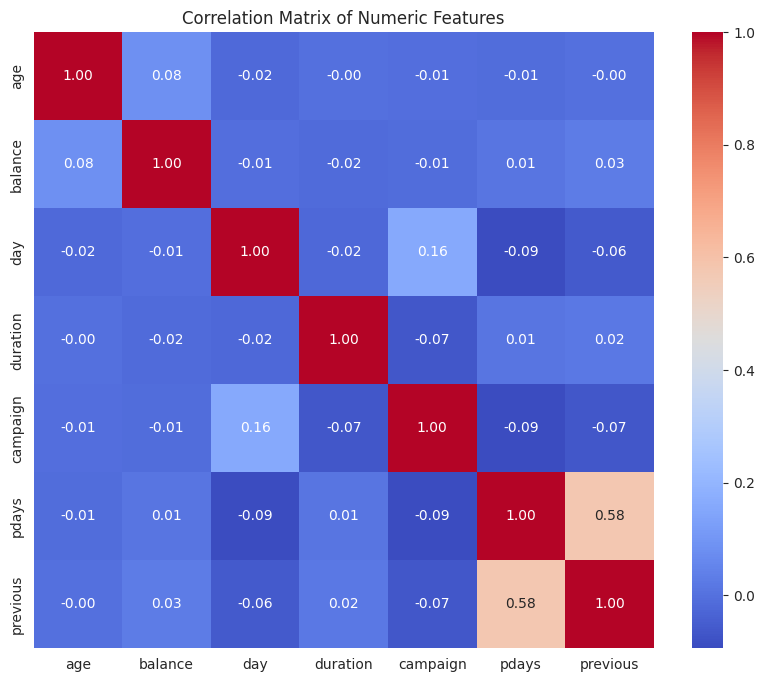

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

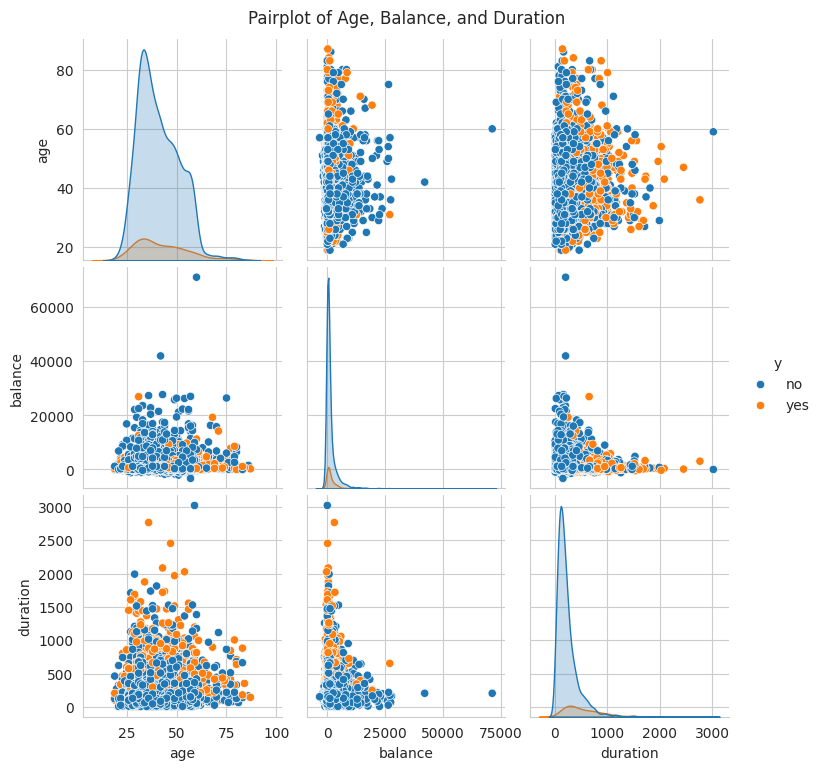

In [13]:
# Create a pairplot for selected features
sns.pairplot(df[['age', 'balance', 'duration','y']], hue='y', diag_kind='kde')
plt.suptitle('Pairplot of Age, Balance, and Duration', y=1.02)
plt.show()

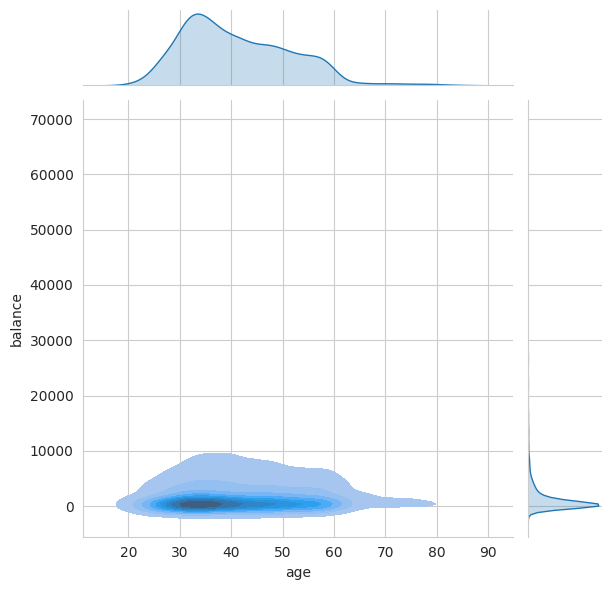

In [14]:
# Create a jointplot of 'age' and 'balance'
sns.jointplot(x='age', y='balance', data=df, kind='kde', fill=True)
plt.show()

In [15]:

import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(df, x="age", y="balance", color="y",
                 title="Scatter Plot of Age vs. Balance",
                 hover_data=['job', 'marital'])
fig.show()

In [16]:
# Create an interactive histogram
fig = px.histogram(df, x="age", color="y", nbins=30,
                   title="Distribution of Age",
                   marginal="box") # or 'rug', 'violin'
fig.show()

In [17]:
# Create an interactive bar chart
fig = px.bar(df.groupby('job')['balance'].mean().reset_index(),
             x='job', y='balance',
             title='Average Balance by Job')
fig.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Separate features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

In [19]:
# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [20]:
# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [21]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [22]:
# Apply preprocessing to the features
X_processed = preprocessor.fit_transform(X)

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [24]:
# Now X_train and X_test are ready for model training
# y_train and y_test are the corresponding target variables
print("Preprocessing complete. Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Preprocessing complete. Data split into training and testing sets.
X_train shape: (3616, 51), y_train shape: (3616,)
X_test shape: (905, 51), y_test shape: (905,)


In [25]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

In [26]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name}: Accuracy = {accuracy:.4f}")
    print(classification_report(y_test,y_pred))


best_model_name = max(results, key=results.get)
best_model_accuracy = results[best_model_name]
print(f"\nBest Model: {best_model_name}, Accuracy: {best_model_accuracy:.4f}")

Logistic Regression: Accuracy = 0.9017
              precision    recall  f1-score   support

          no       0.92      0.98      0.95       807
         yes       0.60      0.28      0.38        98

    accuracy                           0.90       905
   macro avg       0.76      0.63      0.66       905
weighted avg       0.88      0.90      0.88       905

Decision Tree: Accuracy = 0.8862
              precision    recall  f1-score   support

          no       0.94      0.93      0.94       807
         yes       0.48      0.54      0.51        98

    accuracy                           0.89       905
   macro avg       0.71      0.73      0.72       905
weighted avg       0.89      0.89      0.89       905

Random Forest: Accuracy = 0.9017
              precision    recall  f1-score   support

          no       0.91      0.98      0.95       807
         yes       0.63      0.22      0.33        98

    accuracy                           0.90       905
   macro avg       0.77

In [27]:
import joblib

# Assuming 'best_model_name' and 'models' are defined from the previous code

# Use best_model_name to access the best model from the 'models' dictionary
best_model = models[best_model_name]

# Save the best model
joblib.dump(best_model, 'best_model.pkl')

# Load the saved model
loaded_model = joblib.load('best_model.pkl')

# Test the loaded model
y_pred_loaded = loaded_model.predict(X_test)
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)

print(f"\nLoaded Model Accuracy: {accuracy_loaded:.4f}")
print(classification_report(y_test, y_pred_loaded))


Loaded Model Accuracy: 0.9017
              precision    recall  f1-score   support

          no       0.92      0.98      0.95       807
         yes       0.60      0.28      0.38        98

    accuracy                           0.90       905
   macro avg       0.76      0.63      0.66       905
weighted avg       0.88      0.90      0.88       905

